In [1]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in c:\users\vikra\anaconda3\lib\site-packages (2.3.1)


In [2]:
import os
import tensorflow as tf
import h5py
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

In [3]:
print(tf.__version__)

2.3.1


In [4]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [5]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 32s 7us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Test Dataset

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## Preprocessing

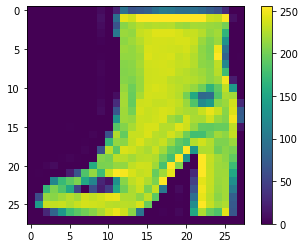

In [13]:
plt.figure()
plt.imshow(train_images[88])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build & Compile the model


In [15]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.4944 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 2s 1000us/step - loss: 0.3358 - accuracy: 0.8781s - loss: 0.3
Epoch 4/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.3104 - accuracy: 0.88630s - loss:
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2958 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2571 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2467 - accuracy: 0.9079
Epoch 10/10
1875/1875 [=============================

In [18]:
KERAS_MODEL_NAME = "tf_model_fashion_mnist.h5"

In [19]:
model.save(KERAS_MODEL_NAME)

In [20]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 1.19 Megabytes


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3239 - accuracy: 0.8856

Test accuracy: 0.8855999708175659


# TF Lite Model

In [22]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [23]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\vikra\AppData\Local\Temp\tmpng8fqx4d\assets


In [24]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

103776

In [25]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 101.344 Kilobytes


# Check Input Tensor Shape

In [26]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


# Resize Tensor Shape

In [27]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [28]:
test_images.dtype

dtype('float64')

In [29]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [30]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [31]:
acc = accuracy_score(prediction_classes, test_labels)

In [32]:
print('Test accuracy TFLITE model :', acc)

Test accuracy TFLITE model : 0.8846


# Get Weights of Keras Model

In [33]:
print(model.get_weights()[0][0][0], type(model.get_weights()[0][0][0]))

-0.3239264 <class 'numpy.float32'>


In [34]:
keras_weight_var = np.array([model.get_weights()[0][0][0]], dtype="float64")

In [35]:
getsizeof(keras_weight_var[0])

32

# Access Quantized Weights of TFLite

In [36]:
TF_LITE_WEIGHTS_TEMP_FILE = "temp_weights_from_tflite.h5"

In [37]:
interpreter = tf.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
all_layers_details = interpreter.get_tensor_details() 
f = h5py.File(TF_LITE_WEIGHTS_TEMP_FILE, "w")   
for layer in all_layers_details:
     grp = f.create_group(str(layer['index']))
     grp.attrs["name"] = layer['name']
     grp.attrs["shape"] = layer['shape']
     grp.attrs["quantization"] = layer['quantization']
     grp.create_dataset("weights", data=interpreter.get_tensor(layer['index']))
f.close()

In [38]:
temp_file = h5py.File(TF_LITE_WEIGHTS_TEMP_FILE, 'r')
print(temp_file["5"]["weights"][0][6], type(temp_file["5"]["weights"][0][6]))

3 <class 'numpy.int8'>


In [39]:
quantized_weight_var = np.array([temp_file["5"]["weights"][0][6]])

In [40]:
getsizeof(quantized_weight_var[0])

25

In [41]:
temp_file.close()